In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [22]:
uri ="Data_example.csv"
df = pd.read_csv(uri)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X       17 non-null     object
 1   Y       17 non-null     object
 2   Z       18 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [23]:
#df.drop_duplicates(inplace=True)
df.replace({r'[^x00-x7F]+':''}, regex=True, inplace=True) 
df['X'].replace('[a-zA-Z]', np.nan,regex=True, inplace=True)
df['Y'].replace('[a-zA-Z]', np.nan,regex=True, inplace=True)
df


,X,Y,Z
0,19,1927,cat
1,NaN,2300,dog
2,15,NaN,bird
3,16,5959,cat
4,16,NaN,cat
5,NaN,4594,dog
6,19,1927,cat
7,20,2879,bird
8,21,NaN,NaN
9,0,4096,cat


In [24]:
df['X'] = df['X'].astype(pd.Int64Dtype())
# df['Y'] = df['Y'].astype(pd.Int64Dtype())
df['Y'] = pd.to_numeric(df['Y'], errors='coerce').dropna() #errors = 'coerce' change to Nan if invalid



In [25]:
df = df.drop_duplicates()
df = df[df.isnull().sum(axis=1)<2]
X_median = int(df['X'].median())
Y_mean = df['Y'].mean()

df['X'].fillna(X_median , inplace=True)
df['Y'].fillna(Y_mean, inplace=True)
df['Z'].ffill(inplace=True)

df

,X,Y,Z
0,19,1927.0,cat
1,20,2300.0,dog
2,15,3817.0,bird
3,16,5959.0,cat
4,16,3817.0,cat
5,20,4594.0,dog
7,20,2879.0,bird
9,0,4096.0,cat
10,20,6730.0,cat
11,25,0.0,bird


In [26]:
df.describe()


,X,Y
count,17.000000,17.000000
mean,79.117647,3817.000000
std,237.607839,1656.399937
min,0.000000,0.000000
25%,16.000000,2792.000000
50%,20.000000,3817.000000
75%,33.000000,4594.000000
max,1000.000000,6730.000000


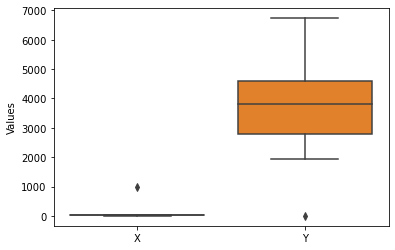

In [27]:
boxplot = sns.boxplot(data=df)
boxplot.set(ylabel="Values")
plt.savefig('../Picture/Lab1/boxplot.png',dpi=300)

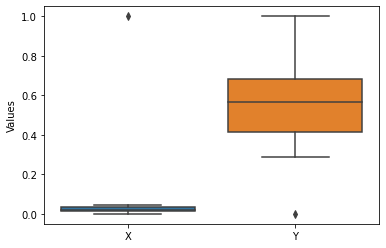

In [28]:
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df[['X','Y']])
minmax_df = pd.DataFrame(minmax_df, columns=['X','Y'])
minmax_df
#sns.set_theme(style="whitegrid")
scale_boxplot  = sns.boxplot(data=minmax_df)
scale_boxplot.set( ylabel='Values')
plt.savefig('../Picture/Lab1/boxplot_minmax.png',dpi=300)


[Text(0, 0.5, 'Values')]

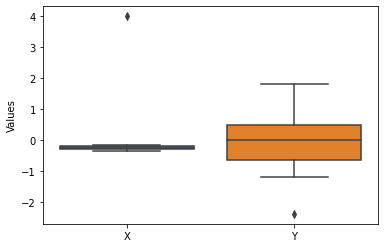

In [29]:
standard_scaler = preprocessing.StandardScaler()
standard_df = standard_scaler.fit_transform(df[['X','Y']])
standard_df = pd.DataFrame(standard_df, columns=['X','Y'])
scale_boxplot  = sns.boxplot(data=standard_df)
scale_boxplot.set( ylabel='Values')

In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
iqr = 1.5*(Q3-Q1)
print(f'{Q1}\n{Q3}\n{iqr}')


X      16.0
Y    2792.0
Name: 0.25, dtype: Float64
X      33.0
Y    4594.0
Name: 0.75, dtype: Float64
X      25.5
Y    2703.0
dtype: Float64


In [31]:
df.drop( df[ (df.X > Q3.X+iqr.X ) | (df.X < Q1.X-iqr.X)].index , inplace=True)
df.drop( df[(df.Y > Q3.Y+iqr.Y ) | (df.Y < Q1.Y-iqr.Y)].index , inplace=True)
df

,X,Y,Z
0,19,1927.0,cat
1,20,2300.0,dog
2,15,3817.0,bird
3,16,5959.0,cat
4,16,3817.0,cat
5,20,4594.0,dog
7,20,2879.0,bird
9,0,4096.0,cat
10,20,6730.0,cat
12,0,2792.0,dog


[Text(0, 0.5, 'Values')]

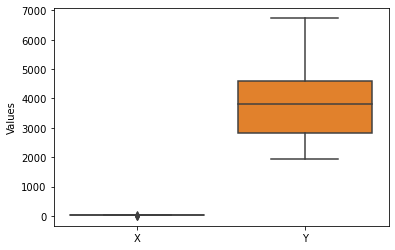

In [32]:
boxplot = sns.boxplot(data=df)
boxplot.set(ylabel="Values")


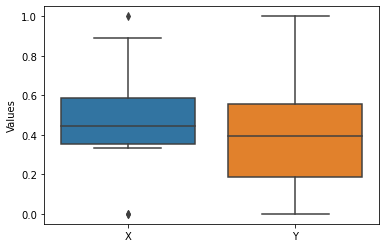

In [33]:
minmax_df = scaler.fit_transform(df[['X','Y']])
minmax_df = pd.DataFrame(minmax_df, columns=['X','Y'])
minmax_df
#sns.set_theme(style="whitegrid")
scale_boxplot  = sns.boxplot(data=minmax_df)
scale_boxplot.set( ylabel='Values')
plt.savefig('../Picture/Lab1/boxplot_dropout.png',dpi=300)

[Text(0, 0.5, 'Values')]

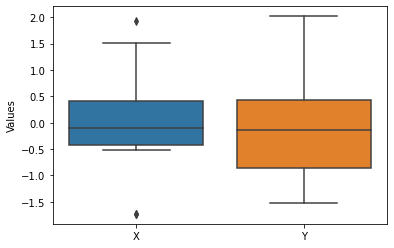

In [34]:
standard_df = standard_scaler.fit_transform(df[['X','Y']])
standard_df = pd.DataFrame(standard_df, columns=['X','Y'])
scale_boxplot  = sns.boxplot(data=standard_df)
scale_boxplot.set( ylabel='Values')

In [35]:
le = preprocessing.LabelEncoder()
df.reset_index(inplace=True)
le.fit(df.Z)
list(le.classes_)

['bird', 'cat', 'dog']

In [36]:
df['Z_category'] = le.transform(df.Z)
df

,index,X,Y,Z,Z_category
0,0,19,1927.0,cat,1
1,1,20,2300.0,dog,2
2,2,15,3817.0,bird,0
3,3,16,5959.0,cat,1
4,4,16,3817.0,cat,1
5,5,20,4594.0,dog,2
6,7,20,2879.0,bird,0
7,9,0,4096.0,cat,1
8,10,20,6730.0,cat,1
9,12,0,2792.0,dog,2


In [37]:
ohe = preprocessing.OneHotEncoder(handle_unknown= 'ignore')
arr = ohe.fit_transform(df[['Z']]).toarray()
#preprocessing.OneHotEncoder(handle_unknown='ignore')
arr



array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [38]:
df[['bird','cat','dog']] = arr
df

,index,X,Y,Z,Z_category,bird,cat,dog
0,0,19,1927.0,cat,1,0.0,1.0,0.0
1,1,20,2300.0,dog,2,0.0,0.0,1.0
2,2,15,3817.0,bird,0,1.0,0.0,0.0
3,3,16,5959.0,cat,1,0.0,1.0,0.0
4,4,16,3817.0,cat,1,0.0,1.0,0.0
5,5,20,4594.0,dog,2,0.0,0.0,1.0
6,7,20,2879.0,bird,0,1.0,0.0,0.0
7,9,0,4096.0,cat,1,0.0,1.0,0.0
8,10,20,6730.0,cat,1,0.0,1.0,0.0
9,12,0,2792.0,dog,2,0.0,0.0,1.0
